In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:/Users/carol/Downloads/teste_indicium_precificacao.csv')
df.head(3)

id                                 nome  host_id    host_name  \
0  2595                Skylit Midtown Castle     2845     Jennifer   
1  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
2  3831      Cozy Entire Floor of Brownstone     4869  LisaRoxanne   

  bairro_group        bairro  latitude  longitude        room_type  price  \
0    Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225   
1    Manhattan        Harlem  40.80902  -73.94190     Private room    150   
2     Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   

   minimo_noites  numero_de_reviews ultima_review  reviews_por_mes  \
0              1                 45    2019-05-21             0.38   
1              3                  0           NaN              NaN   
2              1                270    2019-07-05             4.64   

   calculado_host_listings_count  disponibilidade_365  
0                              2                  355  
1                              1                  365  
2                              1                  194

In [3]:
#verificando informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
#verificando o tamanho da base
df.shape

(48894, 16)

In [5]:
#verificando valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

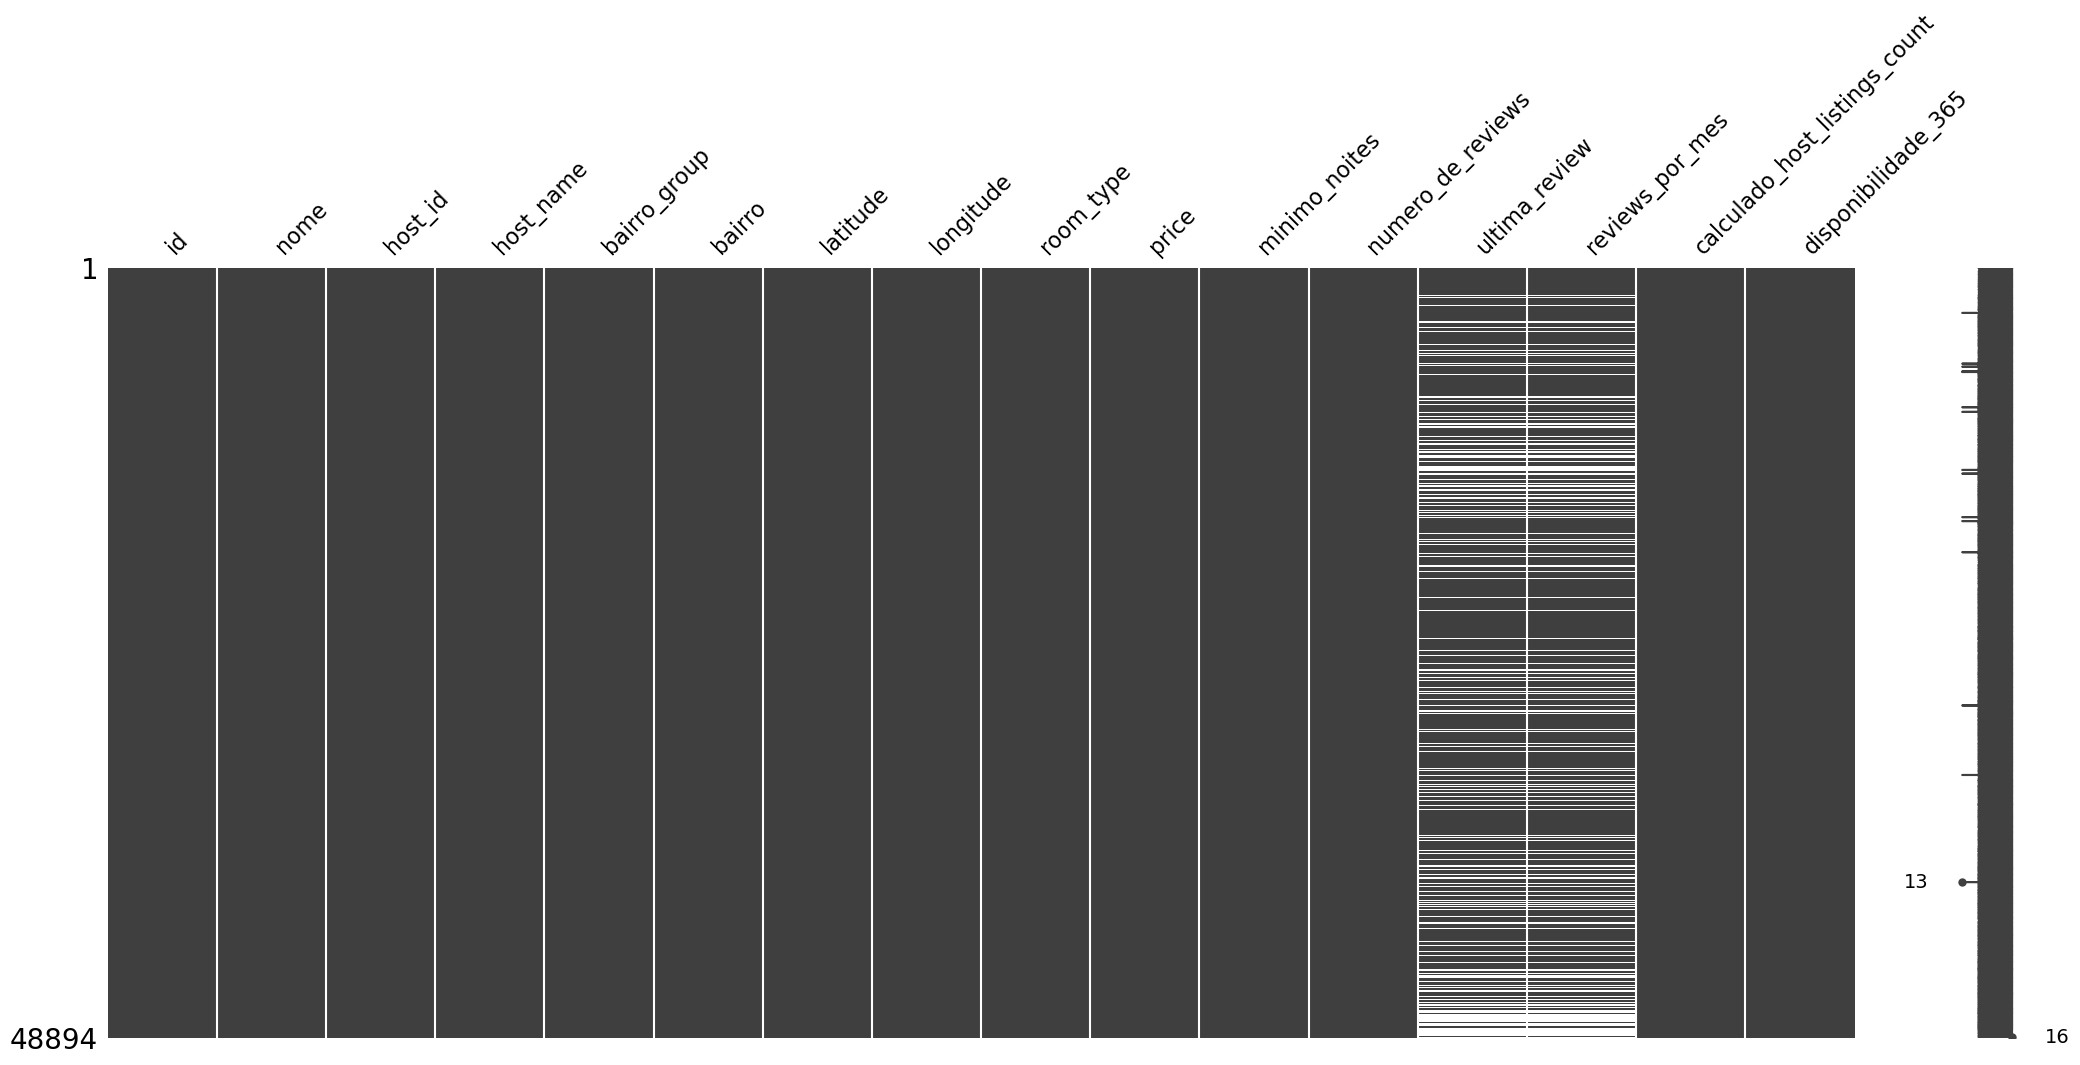

In [6]:
#visualizando valores nulos de forma gráfica
msno.matrix(df);

In [7]:
#vverificando dados duplicados
df.duplicated().sum()

0

#### Exclusão de colunas sem informação relevante nesse momento
- id
- host_id
- host_name

In [8]:
# a coluna 'id' não traz nenhuma informação importante, por isso, iremos excluí-la
df = df.drop(['id','host_name','host_id'], axis = 1)


In [9]:
df.describe()

latitude     longitude         price  minimo_noites  \
count  48894.000000  48894.000000  48894.000000   48894.000000   
mean      40.728951    -73.952169    152.720763       7.030085   
std        0.054529      0.046157    240.156625      20.510741   
min       40.499790    -74.244420      0.000000       1.000000   
25%       40.690100    -73.983070     69.000000       1.000000   
50%       40.723075    -73.955680    106.000000       3.000000   
75%       40.763117    -73.936273    175.000000       5.000000   
max       40.913060    -73.712990  10000.000000    1250.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       48894.000000     38842.000000                   48894.000000   
mean           23.274758         1.373251                       7.144005   
std            44.550991         1.680453                      32.952855   
min             0.000000         0.010000                       1.000000   
25%             1.000000         0.190000                       1.000000   
50%             5.000000         0.720000                       1.000000   
75%            24.000000         2.020000                       2.000000   
max           629.000000        58.500000                     327.000000   

       disponibilidade_365  
count         48894.000000  
mean            112.776169  
std             131.618692  
min               0.000000  
25%               0.000000  
50%              45.000000  
75%             227.000000  
max             365.000000

In [10]:
#melhorando a visualização do describe
with pd.option_context (
    'display.float_format','{:.2f}'.format,
    'display.max_columns', None,
):
    display(df.describe())

latitude  longitude    price  minimo_noites  numero_de_reviews  \
count  48894.00   48894.00 48894.00       48894.00           48894.00   
mean      40.73     -73.95   152.72           7.03              23.27   
std        0.05       0.05   240.16          20.51              44.55   
min       40.50     -74.24     0.00           1.00               0.00   
25%       40.69     -73.98    69.00           1.00               1.00   
50%       40.72     -73.96   106.00           3.00               5.00   
75%       40.76     -73.94   175.00           5.00              24.00   
max       40.91     -73.71 10000.00        1250.00             629.00   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
count         38842.00                       48894.00             48894.00  
mean              1.37                           7.14               112.78  
std               1.68                          32.95               131.62  
min               0.01                           1.00                 0.00  
25%               0.19                           1.00                 0.00  
50%               0.72                           1.00                45.00  
75%               2.02                           2.00               227.00  
max              58.50                         327.00               365.00

In [11]:
#describe das colunas não-numéricas
df.describe(exclude='number')

nome bairro_group        bairro        room_type  \
count            48878        48894         48894            48894   
unique           47904            5           221                3   
top     Hillside Hotel    Manhattan  Williamsburg  Entire home/apt   
freq                18        21661          3920            25409   

       ultima_review  
count          38842  
unique          1764  
top       2019-06-23  
freq            1413

#### Utilizando o Profile Report para verificação do conjunto todo

In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Olhando o Profile Report do Pandas pudemos ver que:
- a região mais procurado parece ser Manhattan
- o tipo de acomodação fica entre entire home/apt e private room
- shared room tem apenas 1160 entradas, parece ser o menos procurado


In [13]:
df.bairro_group.value_counts()

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64

In [14]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64

In [15]:
df.nome.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: nome, Length: 47904, dtype: int64

#### Sendo assim, caso alguém esteja interessado em investir em apartamento para alugar na região, Manhattan poderia ser a região escolhida, focando em espaços inteiros ou quartos privativos

In [16]:
df['nome'] = df['nome'].astype(str)
print(df.dtypes)

nome                              object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object


In [ ]:
# substituindo caracter
df['nome'] = df['nome'].str.replace(r'\$', '', regex=True)

# Gráfico de barras para nome x price
plt.figure(figsize=(10, 6))
plt.bar(df['nome'], df['price'], color='blue')
plt.title('Gráfico de Barras: Nome vs Price')
plt.xlabel('Nome')
plt.ylabel('Price')
plt.show()

In [18]:
df.price.describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

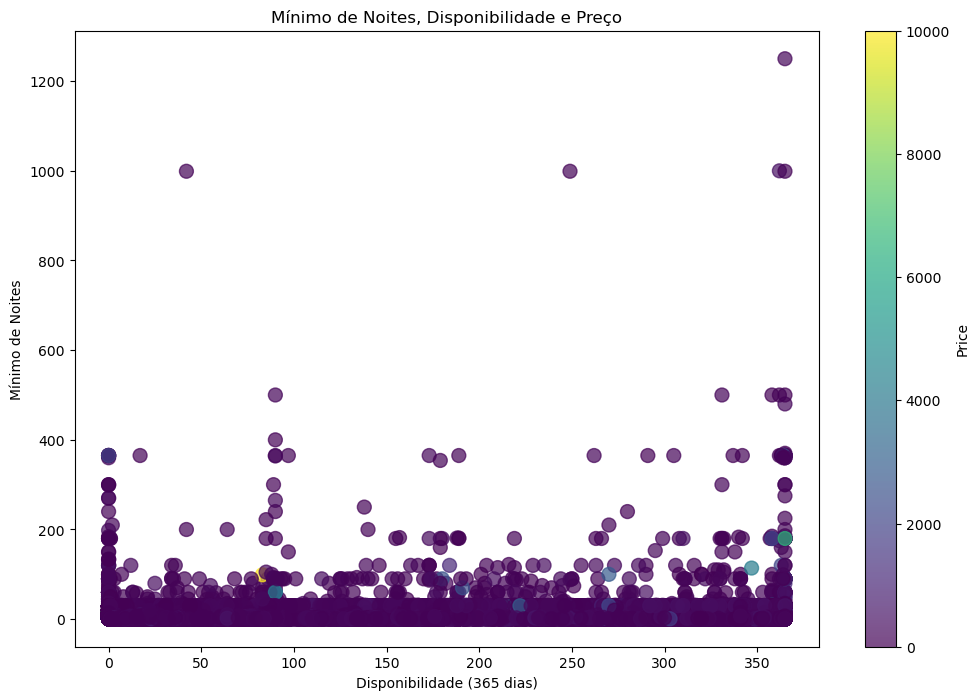

In [19]:
# gráfico de mínimo de noite, disponibilidade e preço
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['disponibilidade_365'], 
    df['minimo_noites'], 
    c=df['price'], 
    cmap='viridis', 
    s=100,  
    alpha=0.7 
)

# Adicionando barra de cores
plt.colorbar(scatter, label='Price')

plt.title('Mínimo de Noites, Disponibilidade e Preço')
plt.xlabel('Disponibilidade (365 dias)')
plt.ylabel('Mínimo de Noites')
plt.show()

#### Explicar gráfico

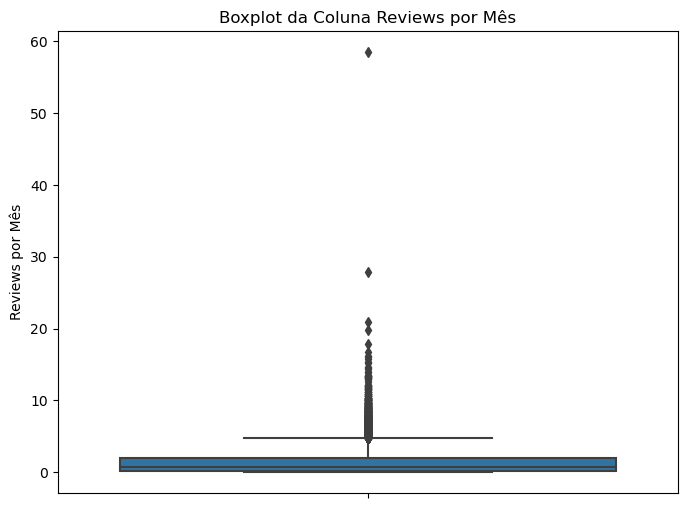

In [20]:
# Boxplot para verificação de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='reviews_por_mes', data=df)
plt.title('Boxplot da Coluna Reviews por Mês')
plt.ylabel('Reviews por Mês')
plt.show()

#### para os dados faltantes das colunas 'ultima_review' e 'reviews_por_mes' iremos adotar técnicas diferentes  para imputação de valores
- como os dados faltantes chegam a 20% faz-se necessário algum tipo de tratamento, pois pode ter algum impacto
- devemos lembrar que a imputação de valores, se não for feita de modo correto, pode causar viés e erros de interpretação
- para 'ultima_review', por se tratar de data, iremos criar uma coluna 'flag' com valores de 0 ou 1
- para 'reviews_por_mes', substituíremos pela mediana, tendo em vista que a distribuição desses dados não segue uma normal e possui outliers

In [21]:
# criando coluna flag para dados faltantes em 'ultima_review'
df['ultima_review_flag'] = df['ultima_review'].isnull().astype(int)

In [22]:
df.head()

nome bairro_group  \
0                             Skylit Midtown Castle    Manhattan   
1               THE VILLAGE OF HARLEM....NEW YORK !    Manhattan   
2                   Cozy Entire Floor of Brownstone     Brooklyn   
3  Entire Apt: Spacious Studio/Loft by central park    Manhattan   
4         Large Cozy 1 BR Apartment In Midtown East    Manhattan   

         bairro  latitude  longitude        room_type  price  minimo_noites  \
0       Midtown  40.75362  -73.98377  Entire home/apt    225              1   
1        Harlem  40.80902  -73.94190     Private room    150              3   
2  Clinton Hill  40.68514  -73.95976  Entire home/apt     89              1   
3   East Harlem  40.79851  -73.94399  Entire home/apt     80             10   
4   Murray Hill  40.74767  -73.97500  Entire home/apt    200              3   

   numero_de_reviews ultima_review  reviews_por_mes  \
0                 45    2019-05-21             0.38   
1                  0           NaN              NaN   
2                270    2019-07-05             4.64   
3                  9    2018-11-19             0.10   
4                 74    2019-06-22             0.59   

   calculado_host_listings_count  disponibilidade_365  ultima_review_flag  
0                              2                  355                   0  
1                              1                  365                   1  
2                              1                  194                   0  
3                              1                    0                   0  
4                              1                  129                   0

In [23]:
# encontrando a mediana e fqzendo a imputação
median_reviews_por_mes = df['reviews_por_mes'].median()
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(median_reviews_por_mes
                                                )

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48894 non-null  object 
 1   bairro_group                   48894 non-null  object 
 2   bairro                         48894 non-null  object 
 3   latitude                       48894 non-null  float64
 4   longitude                      48894 non-null  float64
 5   room_type                      48894 non-null  object 
 6   price                          48894 non-null  int64  
 7   minimo_noites                  48894 non-null  int64  
 8   numero_de_reviews              48894 non-null  int64  
 9   ultima_review                  38842 non-null  object 
 10  reviews_por_mes                48894 non-null  float64
 11  calculado_host_listings_count  48894 non-null  int64  
 12  disponibilidade_365            48894 non-null 

#### Fizemos uma análise exploratória dos dados seguida de imputação de valores e criação de coluna flag